In [2]:
#id : 식별 고유값
#fixed acidity : 고정(비휘발성) 산도: 와인과 관련된 대부분의 산
#volatile acidity : 휘발성 산도: 와인에 함유된 아세트산의 양. 너무 높으면 불쾌한 식초 맛이 날 수 있음
#citric acid : 구연산: 소량으로 발견되며, 와인에 풍미를 더할 수 있음
#residual sugar : 잔여 당분: 발효가 멈춘 후 남은 설탕의 양으로 1g/L 미만의 와인은 드물며 45g/L 이상의 와인은 단맛으로 간주함
#chlorides : 염소화물: 와인의 염분량
#free sulfur dioxide : 유리 이산화황: 미생물의 성장과 와인의 산화를 방지함
#total sulfur dioxide : 총 이산화황: 저농도에서는 대부분 맛이 나지 않으나 50ppm 이상의 농도에서 맛에서 뚜렷하게 나타남
#density : 밀도: 알코올 및 당 함량에 따라 변함
#pH : 산성 또는 염기성 정도. 0(매우 산성) ~ 14(매우 염기성). 대부분의 와인은 pH 3-4 사이임
#sulphates : 황산염: 이산화황 농도에 기여할 수 있는 와인 첨가제. 항균 및 항산화제로 작용
#alcohol : 와인의 알코올 함량 백분율
#type : 와인에 사용된 포도의 종류. Red(적포도주), White(백포도주)로 나뉨
#quality : 맛으로 평가된 와인의 품질

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline

DATA LOAD/DESCRIPT

In [3]:
train=pd.read_csv("train (2).csv").iloc[:,1:]
test=pd.read_csv("test (2).csv").iloc[:,1:]
submit=pd.read_csv("sample_submission.csv")

In [4]:
print(train.info(),test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3231 entries, 0 to 3230
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3231 non-null   float64
 1   volatile acidity      3231 non-null   float64
 2   citric acid           3231 non-null   float64
 3   residual sugar        3231 non-null   float64
 4   chlorides             3231 non-null   float64
 5   free sulfur dioxide   3231 non-null   float64
 6   total sulfur dioxide  3231 non-null   float64
 7   density               3231 non-null   float64
 8   pH                    3231 non-null   float64
 9   sulphates             3231 non-null   float64
 10  alcohol               3231 non-null   float64
 11  type                  3231 non-null   object 
 12  quality               3231 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 328.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3231 entries,

train :
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
quality                 0
dtype: int64 
 AxesSubplot(0.125,0.125;0.698618x0.755)
test :
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64 AxesSubplot(0.125,0.125;0.698618x0.755)


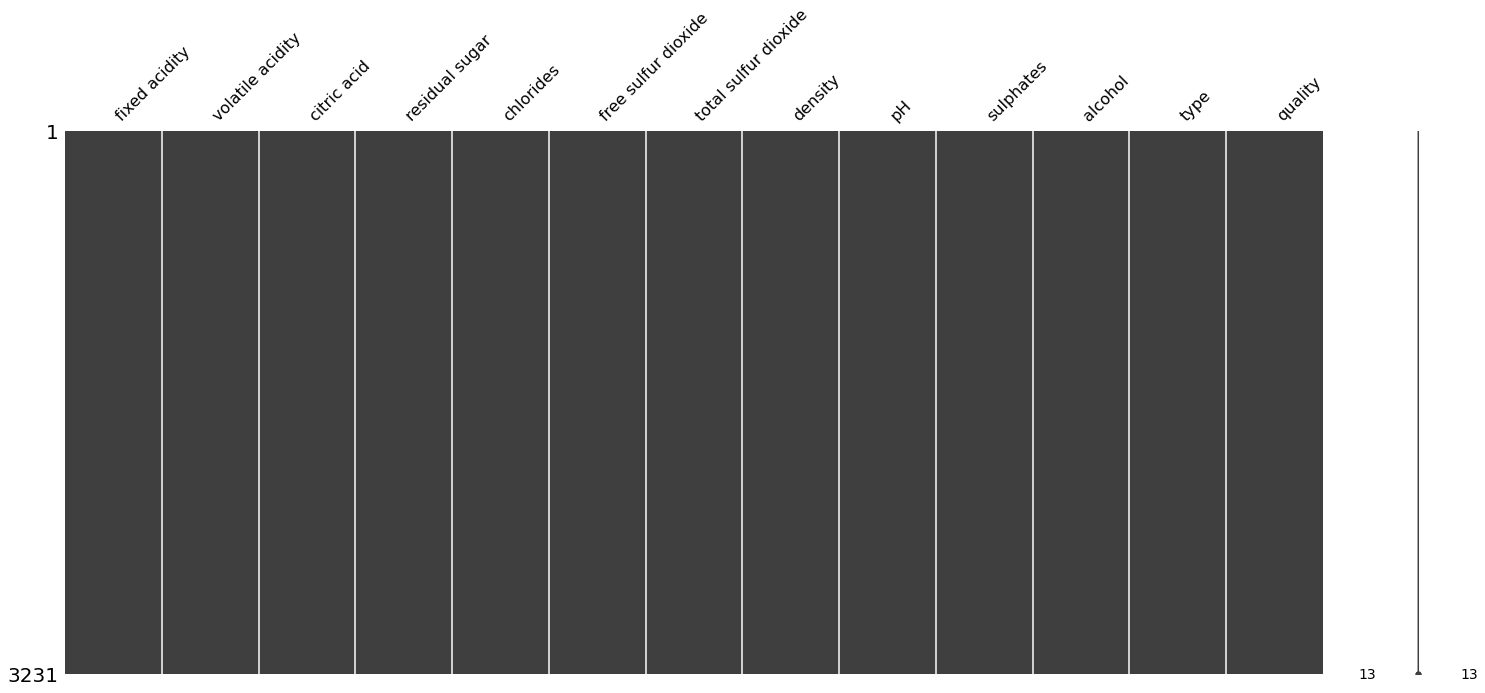

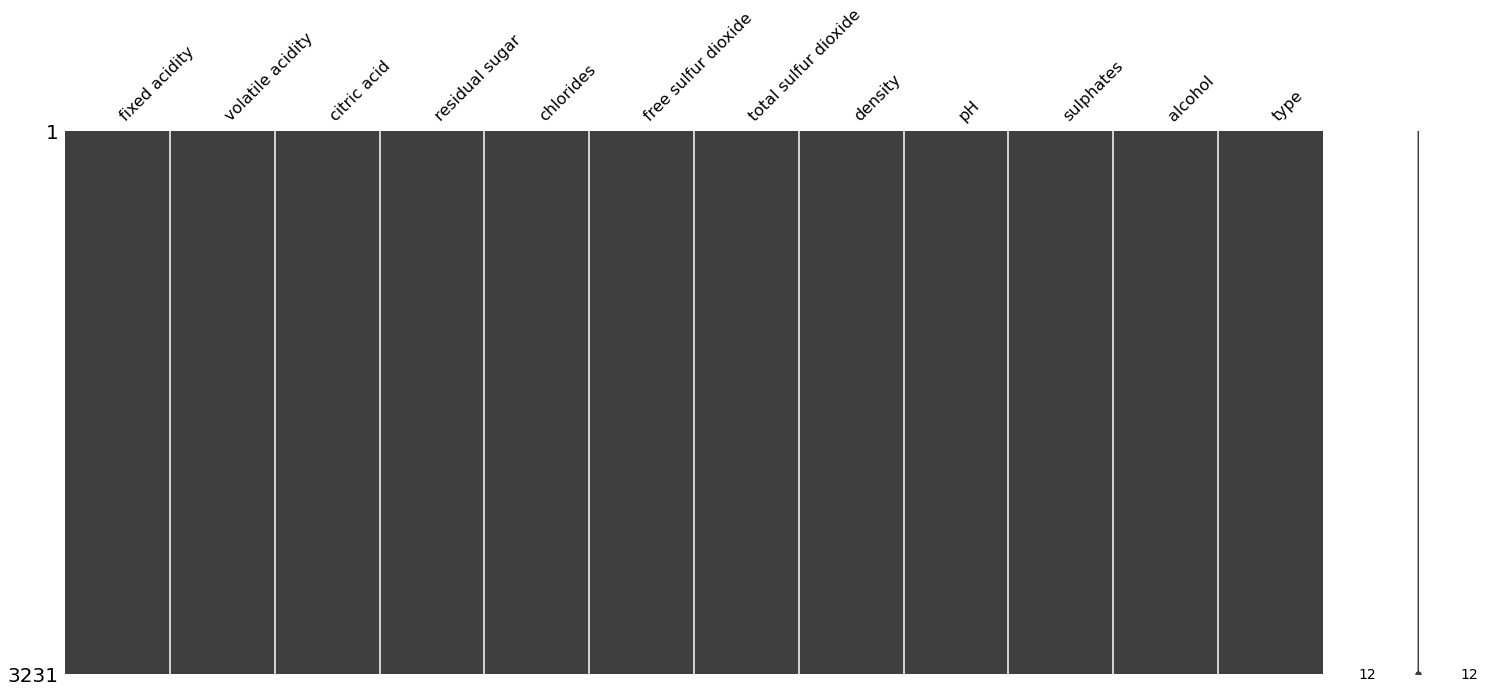

In [5]:
print("train :\n",train.isnull().sum(),"\n",msno.matrix(train))
print("test :\n",test.isnull().sum(),msno.matrix(test))

EXPLORATORY DATA ANALYSIS AND DATA PREPROCESSING

In [6]:
train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000
mean,7.205772,0.336072,0.319496,5.454813,0.055890,30.583720,116.256577,0.994667,3.214166,0.531455,10.497108,5.829155
std,1.295494,0.160285,0.145854,4.816098,0.035722,17.387143,55.759070,0.003054,0.161873,0.149686,1.193813,0.850003
min,3.800000,0.080000,0.000000,0.600000,0.012000,1.000000,6.000000,0.987110,2.720000,0.220000,8.400000,4.000000
25%,6.400000,0.227500,0.250000,1.800000,0.038000,17.000000,78.000000,0.992205,3.100000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.100000,0.047000,29.000000,119.000000,0.994840,3.200000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.064000,42.000000,156.000000,0.996900,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.040000,1.660000,65.800000,0.611000,131.000000,344.000000,1.038980,4.010000,1.980000,14.900000,8.000000


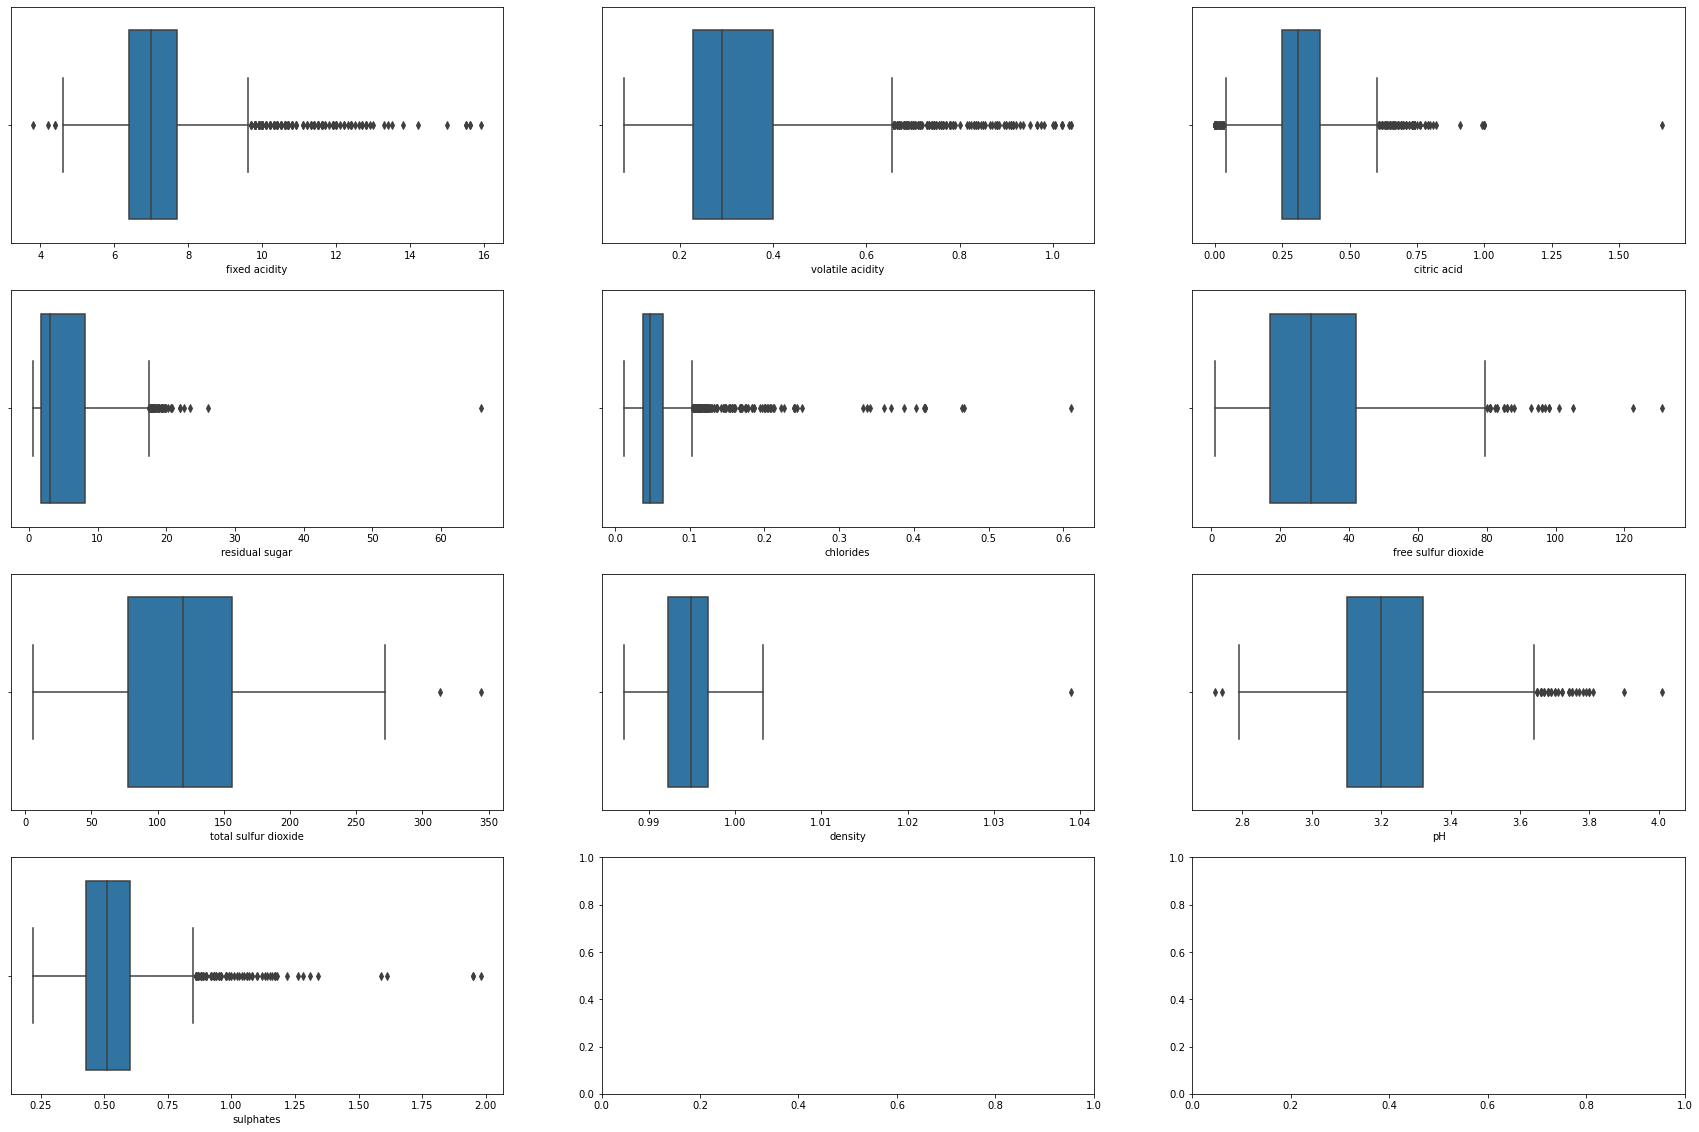

In [7]:
def boxplot(x,data,ax):
    return sns.boxplot(x,data=data,ax=ax)

figure,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12))=plt.subplots(ncols=3,nrows=4)
figure.set_size_inches(30,20)

boxplot(train.columns[0],train,ax=ax1)
boxplot(train.columns[1],train,ax=ax2)
boxplot(train.columns[2],train,ax=ax3)
boxplot(train.columns[3],train,ax=ax4)
boxplot(train.columns[4],train,ax=ax5)
boxplot(train.columns[5],train,ax=ax6)
boxplot(train.columns[6],train,ax=ax7)
boxplot(train.columns[7],train,ax=ax8)
boxplot(train.columns[8],train,ax=ax9)
boxplot(train.columns[9],train,ax=ax10)

박스플랏에서 알 수 있는 점은 모든 변수에서 이상치가 존재한다는 것. 하지만 이들을 다 제거하기에는 그 양이 너무 많기 때문에 특정한 조건을 세워 그 조건에 만족하지 않는 부분들만 제거하는 것이 맞다고 판단하였다.

그래프 결과와 describe값, 변수설명을 참고하여 세운 이상치에 대한 조건
1.pH가 3~4에 해당하지 않으면 이상치로 간주
2.citric acid값이 0보다 작거나 1보다 크면 이상치로 간주
3.residual sugar값이 1 미만 혹은 45 이상이면 이상치로 간주 
4.total sulfur dioxide, density의 이상치

In [8]:
def IQR(y):
    b= (train[y].quantile(0.75)-train[y].quantile(0.25))*1.5
    return b
train=train[(train['total sulfur dioxide']<=train['total sulfur dioxide'].quantile(0.75)+IQR('total sulfur dioxide'))&(train['density']<=train['density'].quantile(0.75)+IQR('density'))&(train['pH']>=3)&(train['pH']<=4)&(train['citric acid']>=0)&(train['citric acid']<=1)&(train['residual sugar']>=1)&(train['residual sugar']<45)]
train.shape
#이상치 제거 결과 2932개 데이터가 남았다.

(2932, 13)

In [8]:
def barplot(x):
    unique=train[x].unique()
    count=train[x].value_counts()
    plt.style.use('ggplot')
    fig=plt.figure(figsize=(15,8))     
    ax1=plt.subplot(1,2,1)
    ax1.bar(unique,count,align='center',color='darkblue')
    plt.xticks(unique)
    plt.ylabel('Count')
    plt.title(x)
    plt.show()

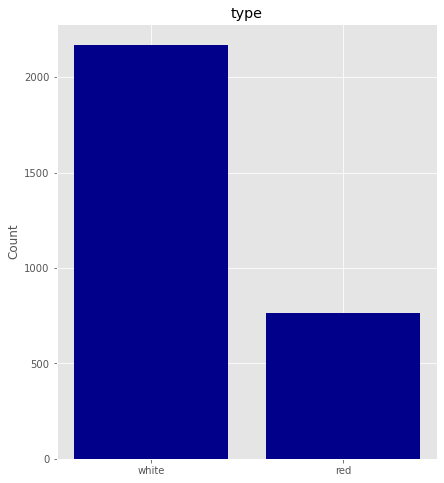

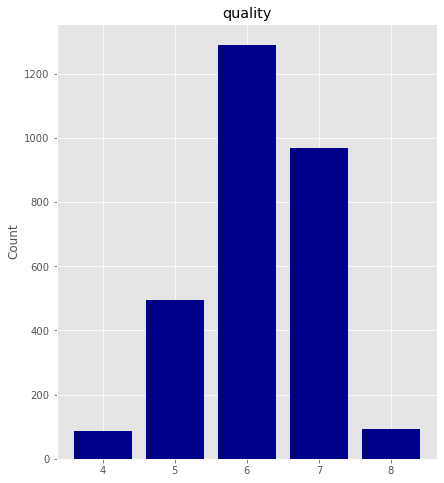

In [9]:
for i in ['type','quality']:
    barplot(i)

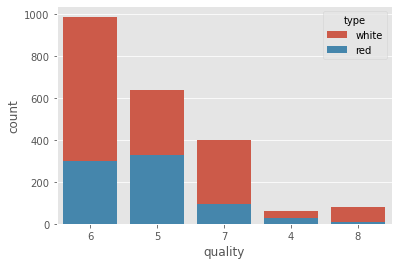

In [10]:
sns.countplot(x='quality',hue='type',dodge=False,order=train['quality'].value_counts().index,data=train)

type의 경우 백포도주가 많았으며 품질은 6,7이 가장 많았다. 또한 품질이 4,5인 집단이 다른 집단에 비해 적포도주의 비율이 높았고 품질점수가 높아질 수록 그 비율은 점점 낮아졌다. 이를 통해 와인의 품질이 더 좋을 수록 백포도주일 가능성이 더 높다는 것을 알 수 있었다.

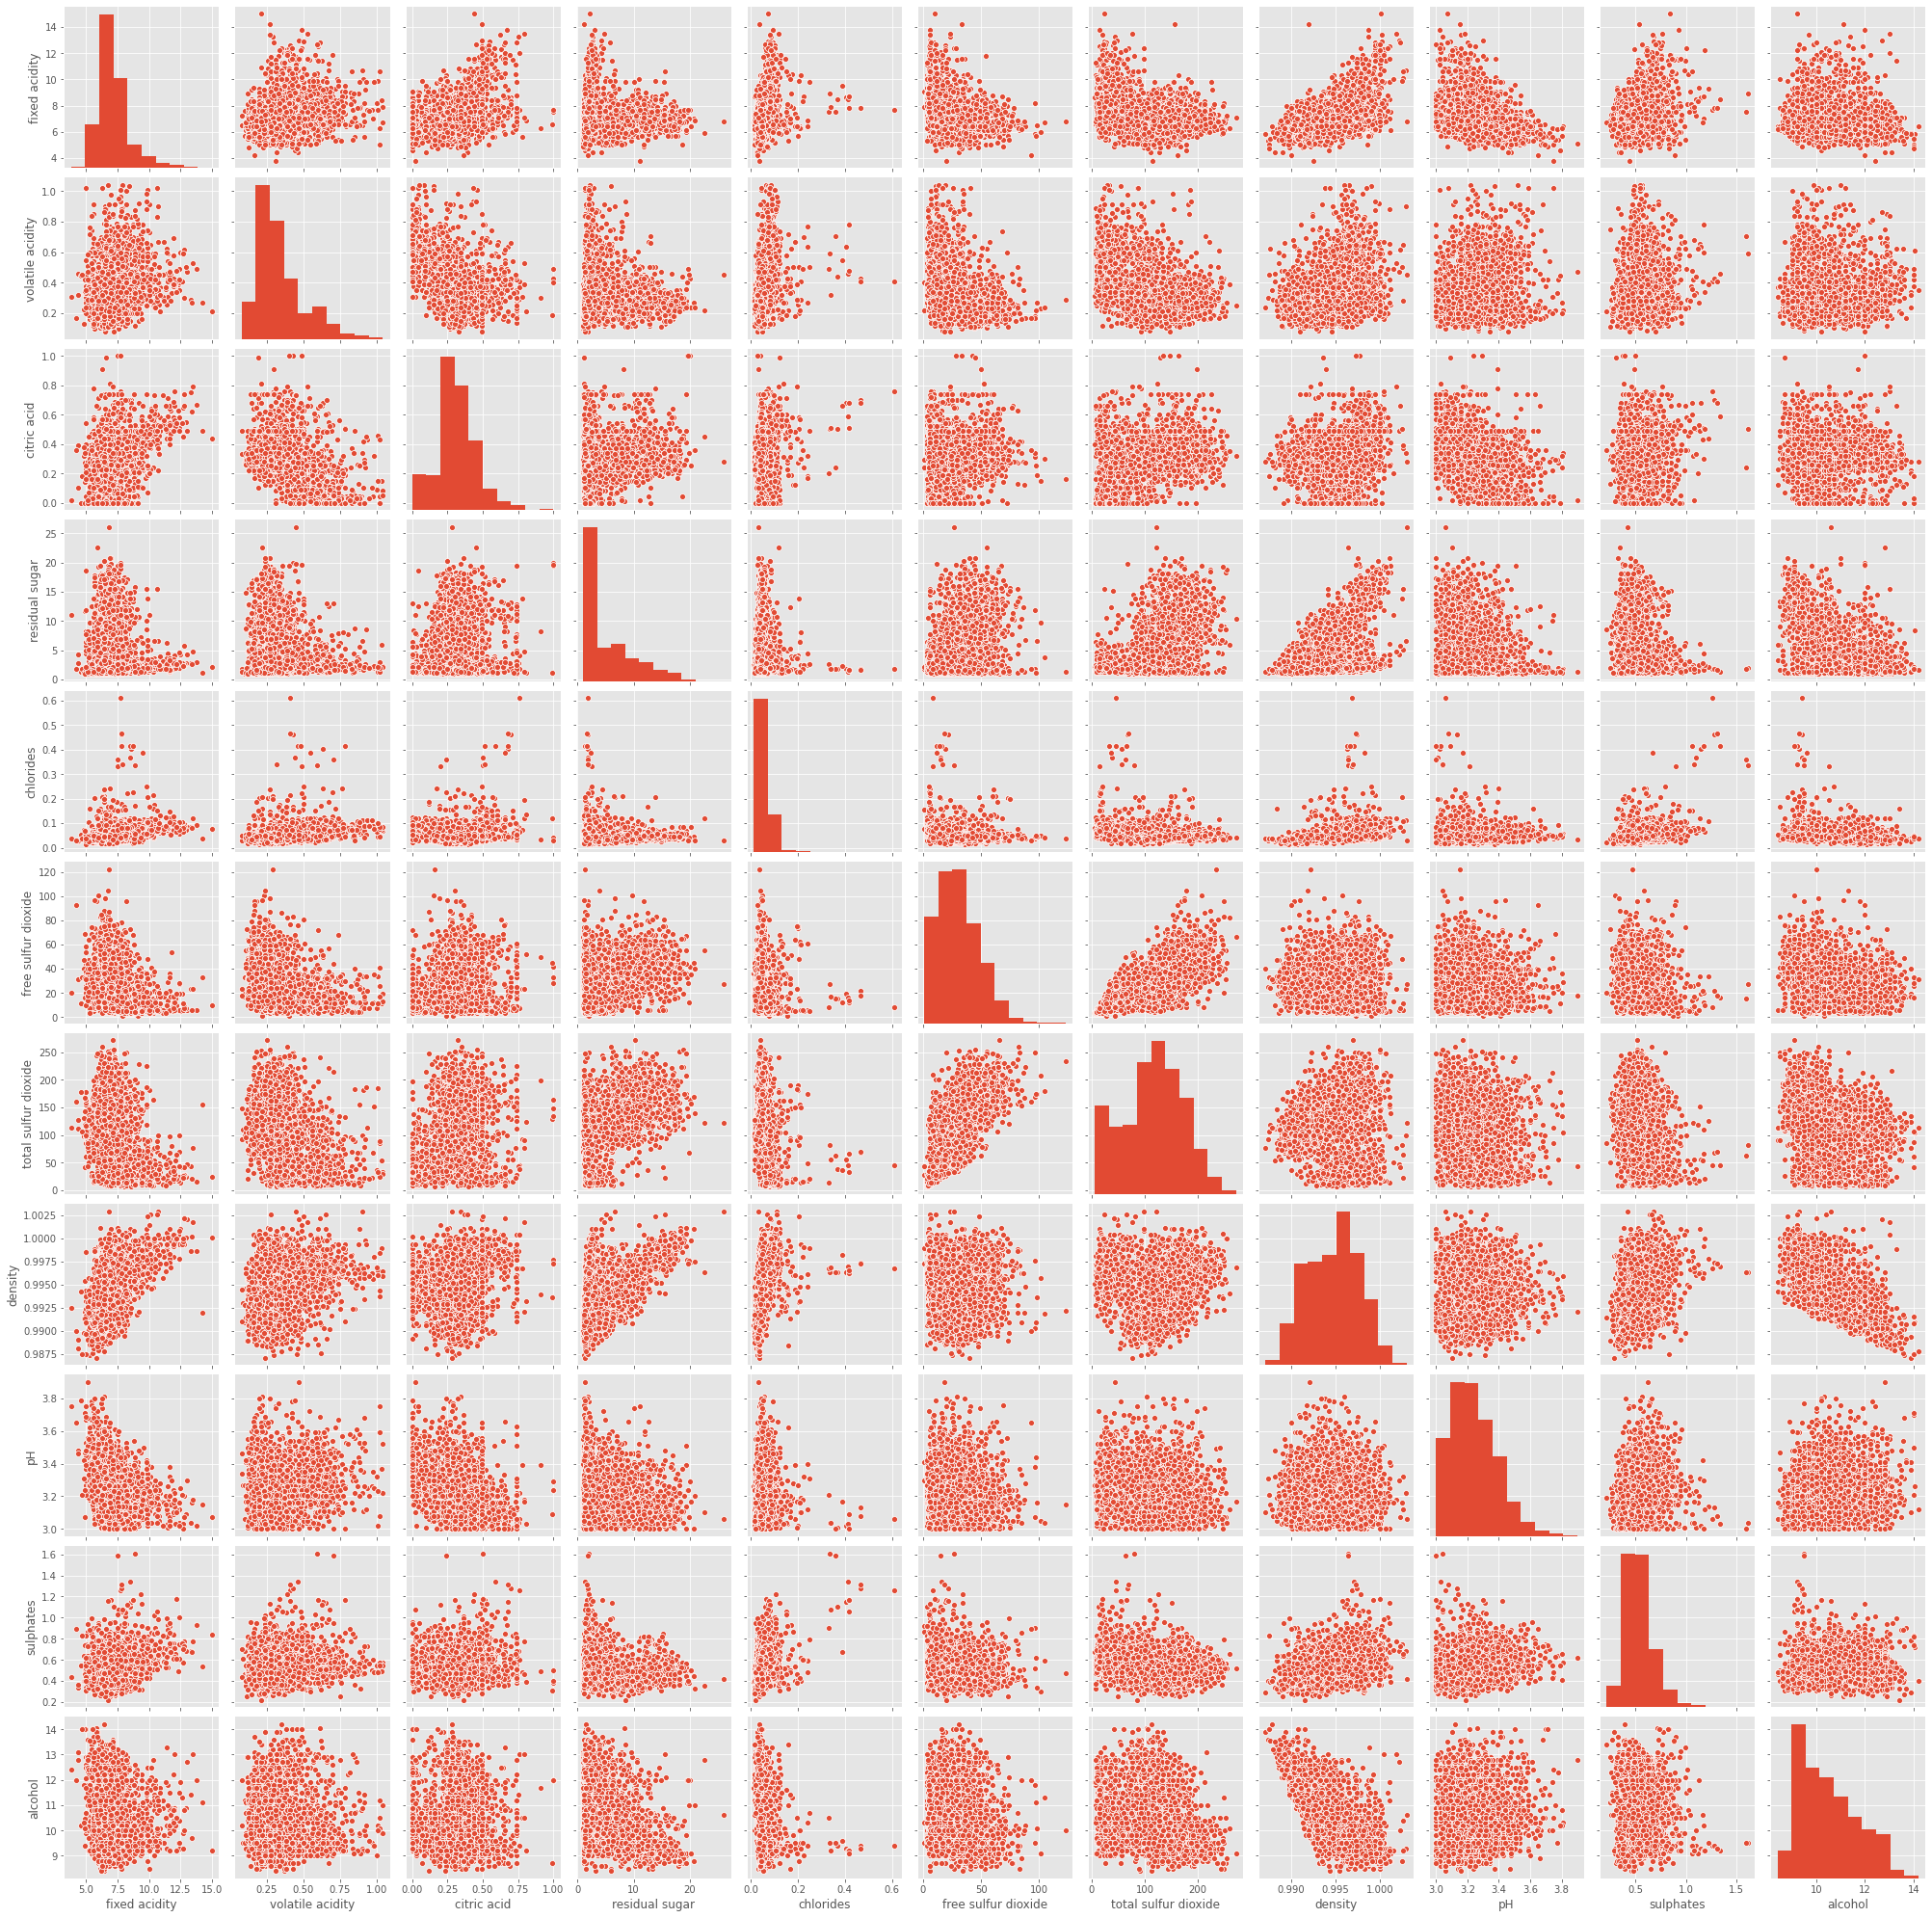

In [12]:
#변수들 간의 관계
traincol=[i for i in train.columns if train[i].dtypes=="float"]
sns.pairplot(train[traincol])

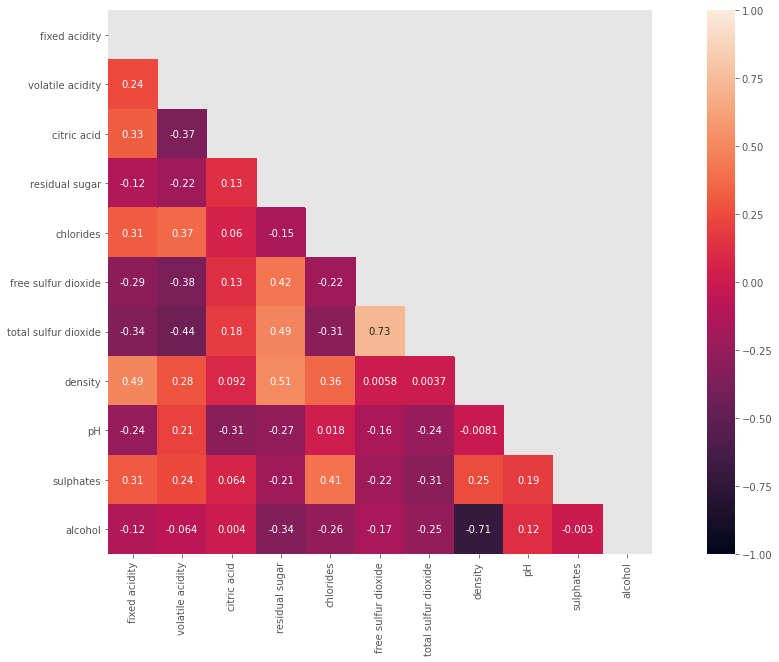

In [13]:
corr=train[traincol].corr()

mask=np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

figure, ax=plt.subplots()
figure.set_size_inches(20,10)
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, square=True, annot=True)

독립 변수들 간 상관관계를 알아보고자 산점도행렬과 히트맵을 그려보았다. total sulfer dioxide와 free sulfur dioxide에서, alcohol과 density에서 강한 상관관계가 나타나있다. 또한 설탕의 잔여량과 free sulfer dioxide, total sulfur dioxide, density사이에서 강하진 않지만 뚜렷한 상관관계가 나타나있어 추후 차원축소를 통하여 독립변수간에 있는 종속관계들을 제거할 것이다. 그 전에, 상관계수가 높은 특정 변수들을 대상으로 quality별로 산점도화시켜 확인해보았다.

In [81]:
def lmplot(x,y):
    sns.lmplot(x=x,y=y,hue='quality',data=train,col='quality')

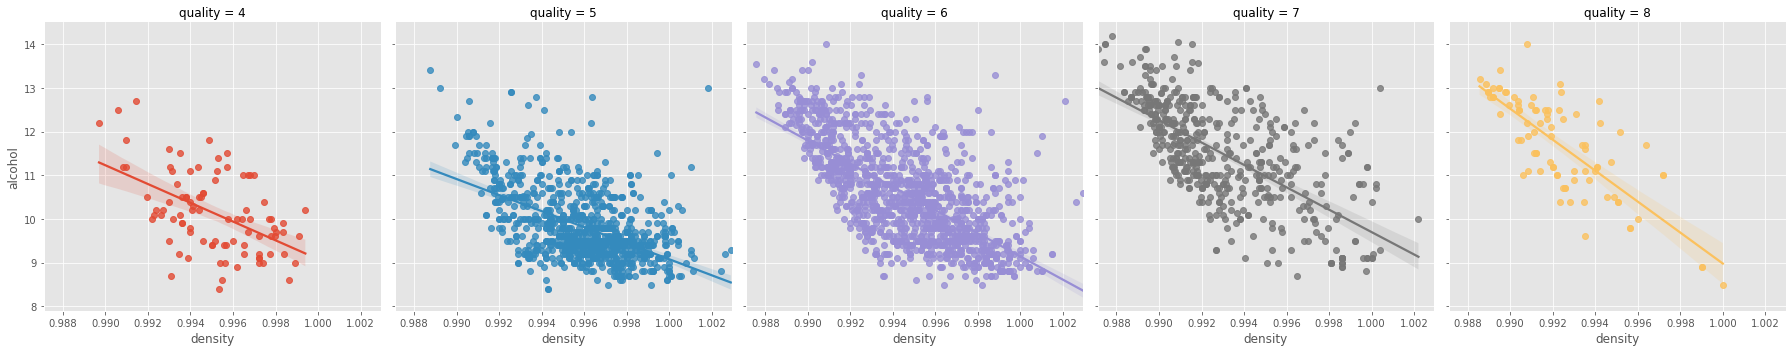

In [82]:
#밀도와 알코올
lmplot('density','alcohol')

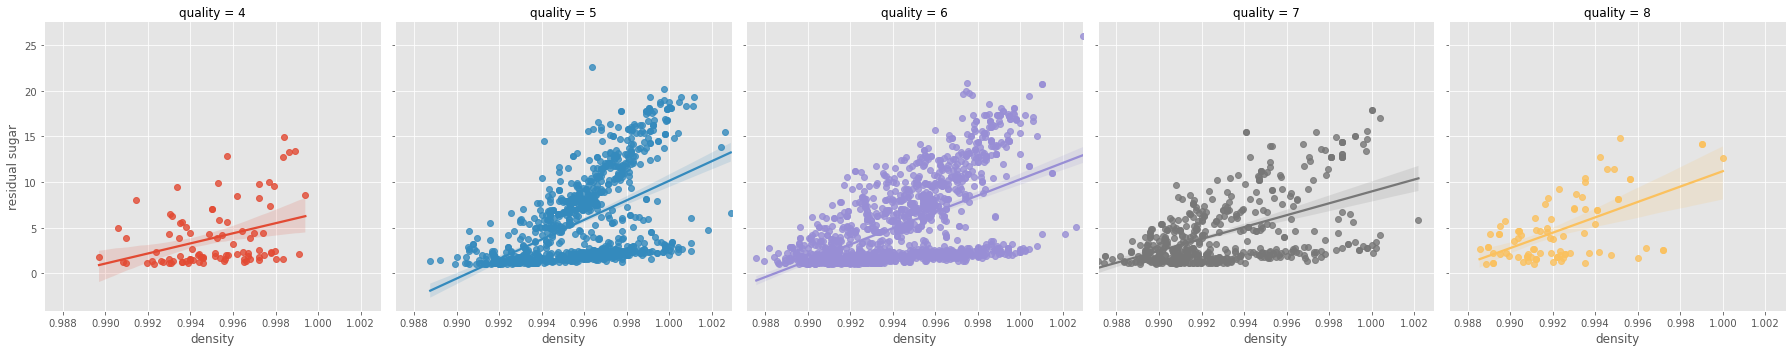

In [83]:
#밀도와 잔여 당분
lmplot('density','residual sugar')

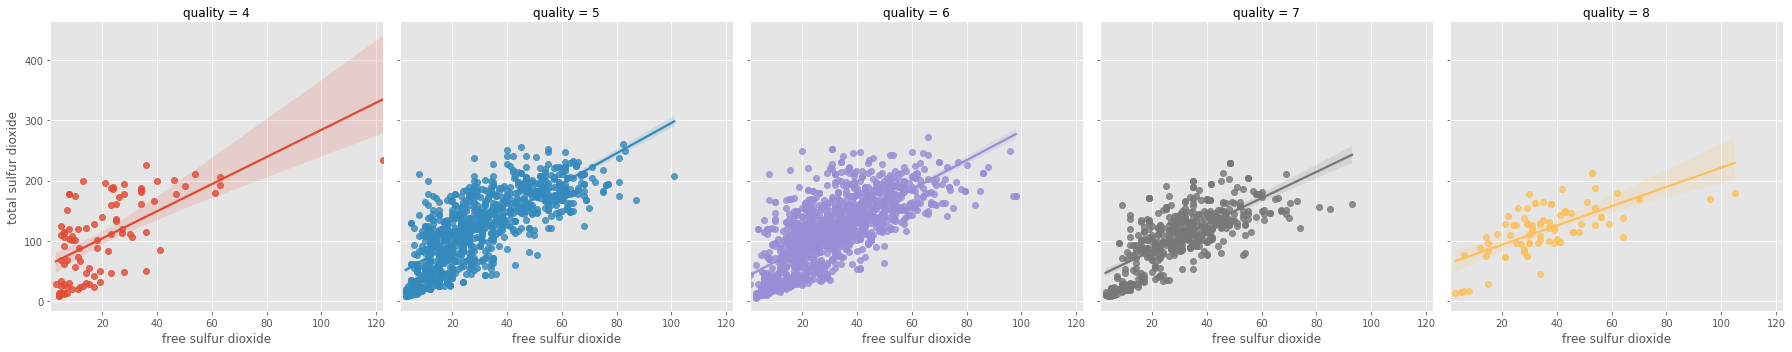

In [84]:
#유리 이산화황과 총 이산화황 
lmplot('free sulfur dioxide','total sulfur dioxide')

밀도와 알코올 : quality가 높을 수록 회귀선의 기울기가 음으로 크게 기우는 것을 알 수 있었으며 이는 밀도가 높아질 수록 알코올의 함량이 크게 줄어든다는 의미로 파악할 수 있다.
밀도와 잔여당분 : quality가 높을 수록 회귀선의 기울기가 양으로 커지는 것을 알 수 있었으며 이는 밀도가 높아질 수록 잔여 당분이 높다는 것을 뜻한다.
유리 이산화황과 총 이산화황 : qaulity가 높을 수록 회귀선의 기울기가 점점 완만해지는 것을 plot을 통해 알 수 있다. 이는 모든 quality집단에서 유리 이산화황이 높을 수록 총 이산화황이 높지만 높은 숫자의 quality집단에서 총 이산화황 대비 유리 이산화황이 적다는 것을 알 수 있다.

결론적으로 당도와 밀도가 높고 알코올의 함유량은 낮으면서 유리 이산화황이 적은 와인일 수록 높은 품질로 평가받았을 가능성이 높다.  

DIMENTION REDUCTION

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

                        PCA explained variance  PCA explained variance_ratio  \
principal component 1                 3.102013                      0.310096   
principal component 2                 2.087903                      0.208719   
principal component 3                 1.362501                      0.136204   
principal component 4                 0.960676                      0.096035   
principal component 5                 0.717639                      0.071739   
principal component 6                 0.537678                      0.053749   
principal component 7                 0.514733                      0.051456   
principal component 8                 0.367144                      0.036702   
principal component 9                 0.252398                      0.025231   
principal component 10                0.100727                      0.010069   

                        Cum Ratio  
principal component 1    0.310096  
principal component 2    0.518815  
principal c

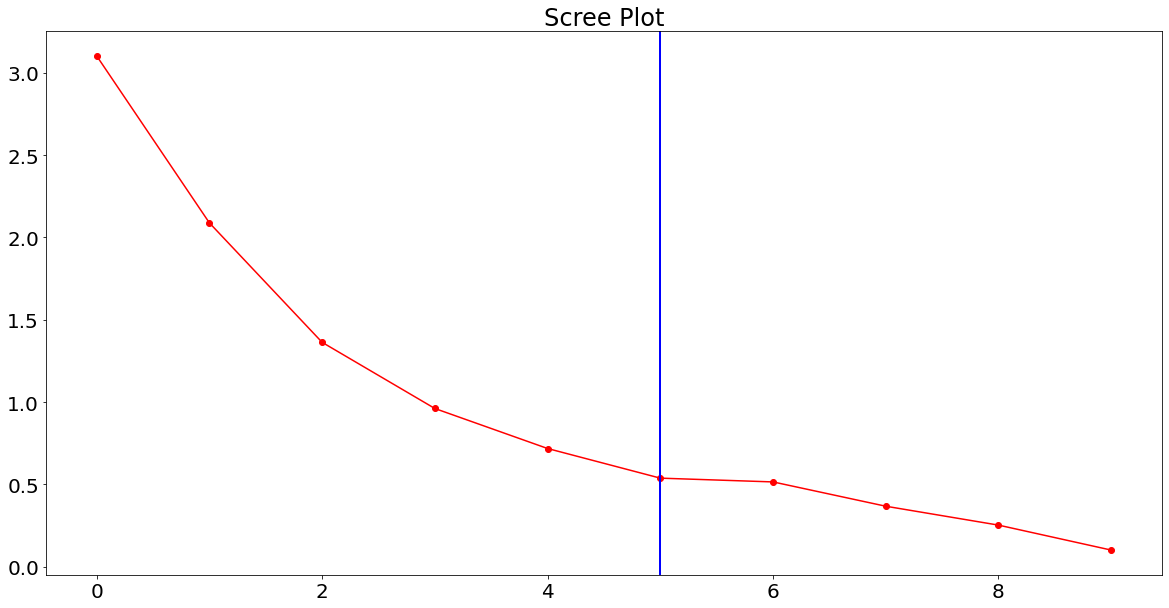

적절한 주성분 개수 :  5 개


In [10]:
train2=train
train3=train2.iloc[:,:10]
std=StandardScaler().fit_transform(train3)
pca=PCA()
pca.fit_transform(std)

compname="principal component"
variance=pd.DataFrame(pca.explained_variance_,index=[compname+" "+str(i) for i in range(1,train3.shape[1]+1)],columns=["PCA explained variance"])
varratio=pd.DataFrame(pca.explained_variance_ratio_,index=[compname+" "+str(i) for i in range(1,train3.shape[1]+1)],columns=["PCA explained variance_ratio"])
cumratio=pd.DataFrame(pca.explained_variance_ratio_.cumsum(),index=[compname+" "+str(i) for i in range(1,train3.shape[1]+1)],columns=["Cum Ratio"])

pcasum=pd.concat([variance,varratio,cumratio],axis=1)
print(pcasum)
plt.figure(figsize=(20,10))
plt.rc('font',size=20)
plt.plot(pca.explained_variance_,'o-',color='red')
plt.title("Scree Plot")
plt.axvline(x=pcasum[pcasum['Cum Ratio']<=0.85].shape[0],linewidth=2,color='blue')
plt.show()
print("적절한 주성분 개수 : ",pcasum[pcasum['Cum Ratio']<=0.85].shape[0],"개")

앞서 변수간 상관관계를 산점도행렬과 히트맵으로 확인한 결과 변수간 상관관계가 일부 존재한다는 것을 알 수 있었다. 만약 변수간 상관성이 존재한다면, 회귀분석이나 머신러닝같은 방법으로 분류 예측을 할 경우 모델이 과적합되는 문제점이 발생할 수 있다. 그렇기 때문에 주성분분석을 통하여 10차원을 축소하였고, 누적 설명율이 80%정도만 되어도 충분하기 때문에 82%를 설명하는 제 5주성분까지 주성분을 선택하였다. 

In [17]:
typenum = {'white':0, 'red':1}
train['type']=train['type'].replace(typenum)
test['type']=test['type'].replace(typenum)

#주성분 개수를 5개로 두어 train, test데이터세트 차원 축소
def pca(data):
    pca_data=PCA(n_components=5)
    pca_data=pca_data.fit_transform(data)
    return pca_data
test2=StandardScaler().fit_transform(test.iloc[:,:10])
trainpca=pd.DataFrame(pca(train3),columns=["PCA"+str(i) for i in range(1,6)])
testpca=pd.DataFrame(pca(test2),columns=["PCA"+str(i) for i in range(1,6)])
traintype=pd.DataFrame(train['type'],columns=['type']).reset_index().iloc[:,1]
testtype=pd.DataFrame(test['type'],columns=['type']).reset_index().iloc[:,1]

In [18]:
traindata=pd.concat([trainpca,traintype],axis=1)
testdata=pd.concat([testpca,testtype],axis=1)

MUCHINE LEARNING

In [28]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

param={'max_depth':[i for i in range(1,30,5)],'min_samples_split':[i for i in range(2,6)]}
y=train.iloc[:,-1]
fit=RandomForestClassifier(random_state=30)
pred=cross_val_score(fit,traindata,y,scoring='accuracy',cv=5)
print(np.mean(pred))

fit2=XGBClassifier(random_state=11,max_depth=30)
pred2=GridSearchCV(fit2,param_grid=param,scoring='accuracy',cv=5,refit=True)
pred2.fit(traindata,y)
scores_df=pd.DataFrame(pred2.cv_results_)

fit3=LGBMClassifier(random_state=11,max_depth=30)
pred3=GridSearchCV(fit3,param_grid=param,scoring='accuracy',cv=5,refit=True)
pred3.fit(traindata,y)
scores_df2=pd.DataFrame(pred3.cv_results_)

0.5562715490926851
[15:39:07] WARNING: ..\src\learner.cc:541: 
Parameters: { min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:39:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jeong SeungJu\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:39:07] WARNING: ..\src\learner.cc:541: 
Parameters: { min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:39:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:08] WARNING: ..\src\learner.cc:541: 
Parameters: { min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:39:08] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, th

[15:39:13] WARNING: ..\src\learner.cc:541: 
Parameters: { min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:39:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:13] WARNING: ..\src\learner.cc:541: 
Parameters: { min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:39:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, th

[15:39:28] WARNING: ..\src\learner.cc:541: 
Parameters: { min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:39:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:30] WARNING: ..\src\learner.cc:541: 
Parameters: { min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:39:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, th

[15:39:52] WARNING: ..\src\learner.cc:541: 
Parameters: { min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:39:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:54] WARNING: ..\src\learner.cc:541: 
Parameters: { min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:39:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, th

[15:40:30] WARNING: ..\src\learner.cc:541: 
Parameters: { min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:40:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:34] WARNING: ..\src\learner.cc:541: 
Parameters: { min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:40:34] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, th

[15:41:24] WARNING: ..\src\learner.cc:541: 
Parameters: { min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:41:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:27] WARNING: ..\src\learner.cc:541: 
Parameters: { min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:41:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, th

[15:42:12] WARNING: ..\src\learner.cc:541: 
Parameters: { min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:42:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:15] WARNING: ..\src\learner.cc:541: 
Parameters: { min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:42:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, th

[15:43:03] WARNING: ..\src\learner.cc:541: 
Parameters: { min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:43:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:43:07] WARNING: ..\src\learner.cc:541: 
Parameters: { min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:43:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, th

[15:43:55] WARNING: ..\src\learner.cc:541: 
Parameters: { min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:43:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:43:59] WARNING: ..\src\learner.cc:541: 
Parameters: { min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:43:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, th

[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Wa

AttributeError: 'DataFrame' object has no attribute 'best_estimator_'

In [36]:
fit4=fit.fit(traindata,y)
rfpred=fit4.predict(testdata)

estimator=pred2.best_estimator_
xgpred=estimator.predict(testdata)

array([5, 5, 5, ..., 6, 5, 6], dtype=int64)

In [37]:
submit2=submit
submit2['quality']=xgpred
submit2.to_csv("sample_submission.csv",index=False)